## Import Packages and CSV

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", 100)
# Create Dataframe
df = pd.read_csv('dataset.csv')
# Print shape of dataset
print(df.shape)

(72946, 10)


## Data Cleaning

In [2]:
df.rename(columns={"Unnamed: 0":"SNo"},inplace=True)
df.index=pd.to_datetime(df.date)
df.drop(["SNo","timestamp"],axis=1,inplace=True)

## Again here we are gonna take bitcoin data

In [3]:
df_bitcoin=df[df['crypto_name']=='Bitcoin']
df_bitcoin

,open,high,low,close,volume,marketCap,crypto_name,date
date,,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,Bitcoin,2013-05-05
2013-05-06,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,Bitcoin,2013-05-06
2013-05-07,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,Bitcoin,2013-05-07
2013-05-08,109.599998,115.779999,109.599998,113.566002,0.000000e+00,1.264049e+09,Bitcoin,2013-05-08
2013-05-09,113.199997,113.459999,109.260002,112.669998,0.000000e+00,1.254535e+09,Bitcoin,2013-05-09
...,...,...,...,...,...,...,...,...
2022-09-25,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11,Bitcoin,2022-09-25
2022-10-02,19311.848708,19370.309281,18970.620583,19044.107272,2.076596e+10,3.650248e+11,Bitcoin,2022-10-02
2022-10-09,19417.479411,19542.538654,19349.258953,19446.426194,1.683726e+10,3.728768e+11,Bitcoin,2022-10-09


In [4]:
closing_price=df_bitcoin['close']

In [5]:
closing_price=pd.DataFrame(closing_price)
closing_price

,close
date,
2013-05-05,115.910004
2013-05-06,112.300003
2013-05-07,111.500000
2013-05-08,113.566002
2013-05-09,112.669998
...,...
2022-09-25,18802.097976
2022-10-02,19044.107272
2022-10-09,19446.426194


## Summary

In [6]:
closing_price.describe()

,close
count,3248.000000
mean,9694.587144
std,15061.798756
min,68.431000
25%,450.111259
50%,3770.343509
75%,9707.213528
max,67566.830088


### line chart for closing price

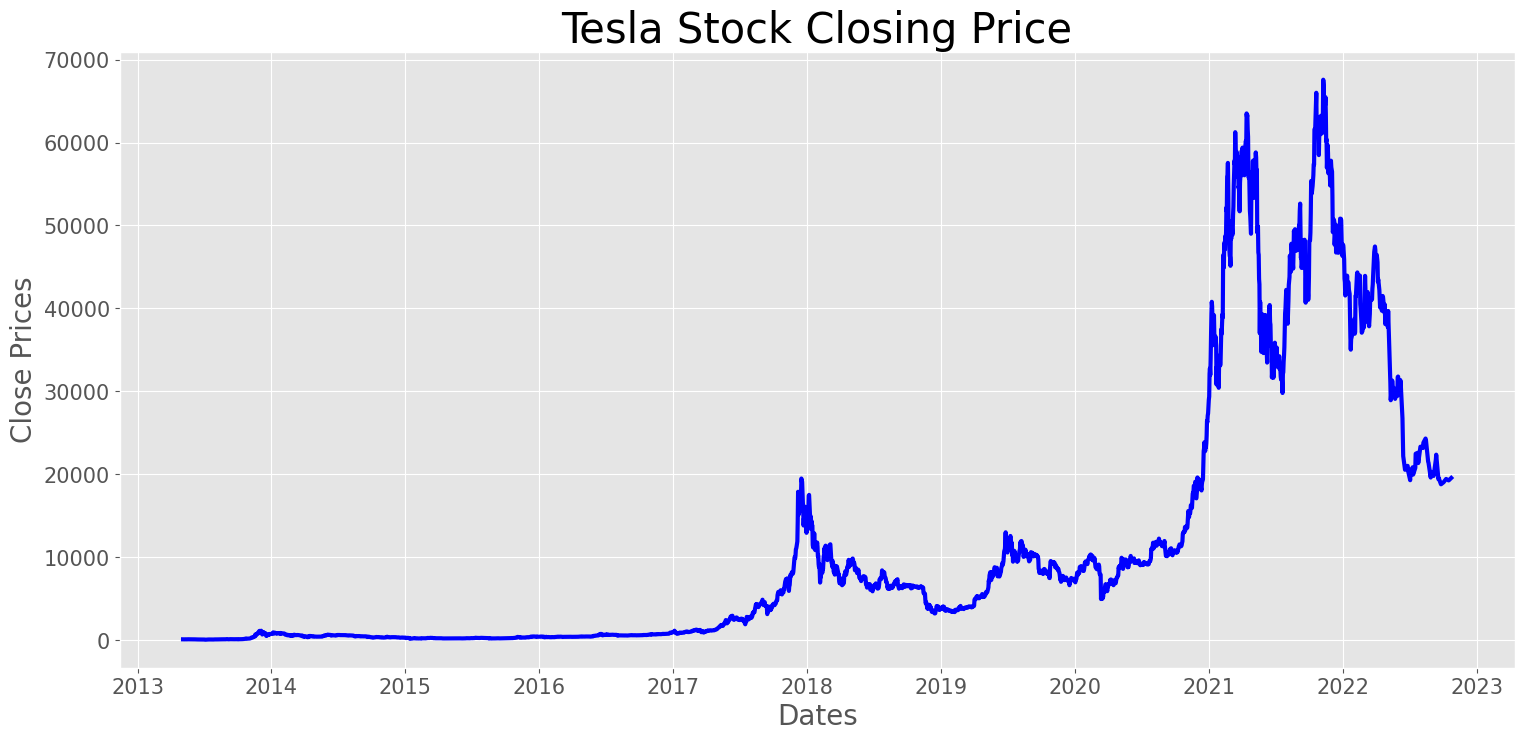

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(closing_price['close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

## distribution plot of closing price

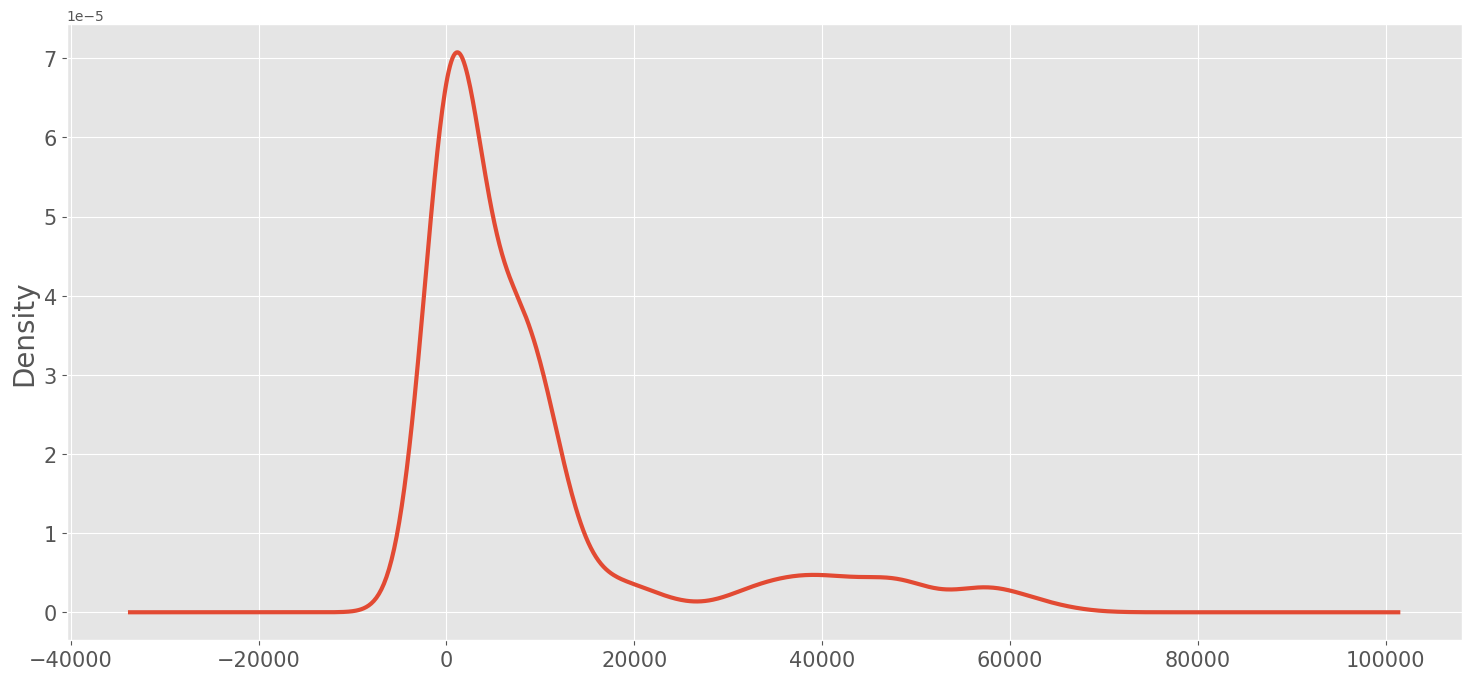

In [19]:
#distribution plot of closing price
df_close = closing_price["close"]
df_close.plot(kind = 'kde', figsize = (18, 8), linewidth = 3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel("Density", fontsize = 20)
plt.yticks(fontsize=15)
plt.show()

**A bell shaped curve with outliers present**

## Test for stationarity

In [20]:
#Importing libararies
from statsmodels.tsa.stattools import adfuller

#Creating a function to check for stationarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

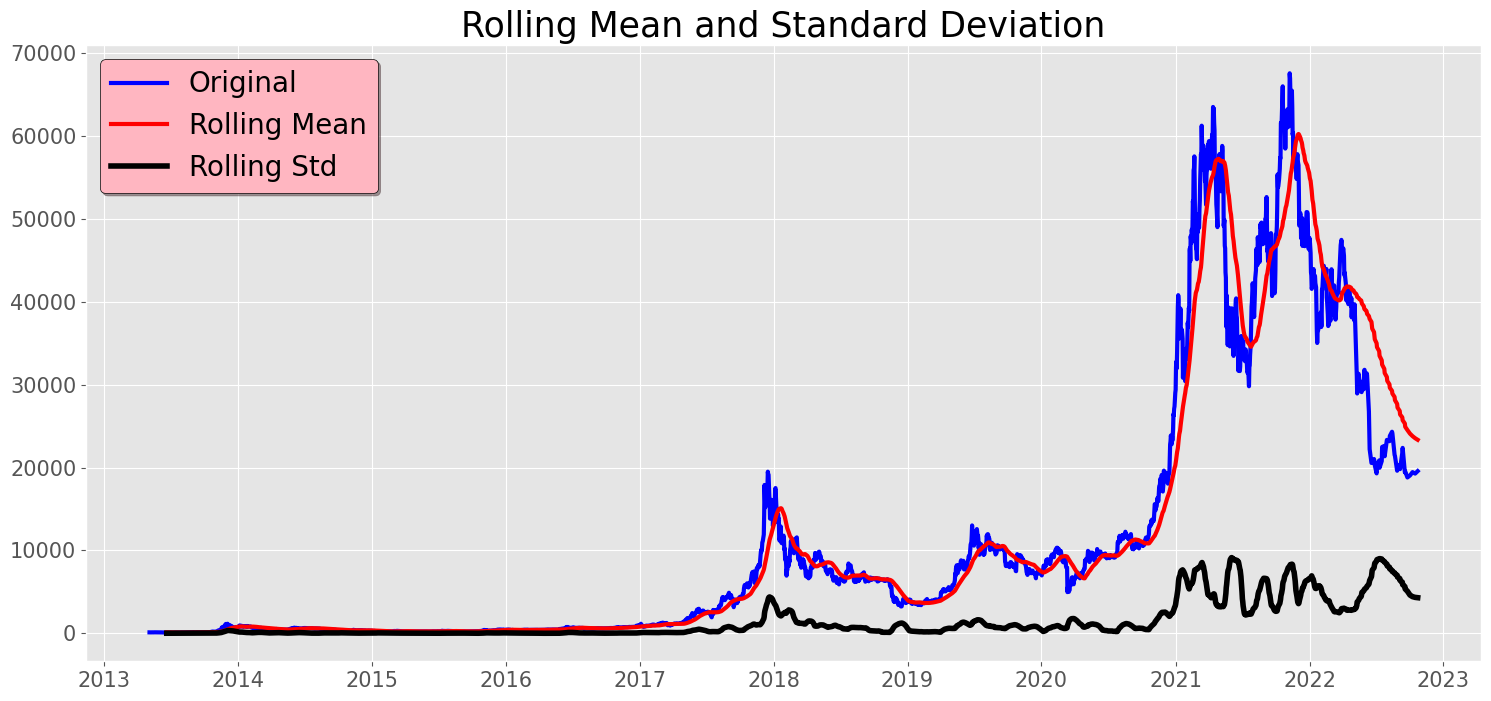

Results of dickey fuller test
Test Statistics                  -1.601251
p-value                           0.482965
No. of lags used                 29.000000
Number of observations used    3218.000000
critical value (1%)              -3.432384
critical value (5%)              -2.862439
critical value (10%)             -2.567248
dtype: float64


In [ ]:
test_stationarity(closing_price['close'])

### Ok,the time series is not stationary since the P_value is not less than 0.05

## decomposing time series is made of level, trend, seasonality, noise

<Figure size 2000x1000 with 0 Axes>

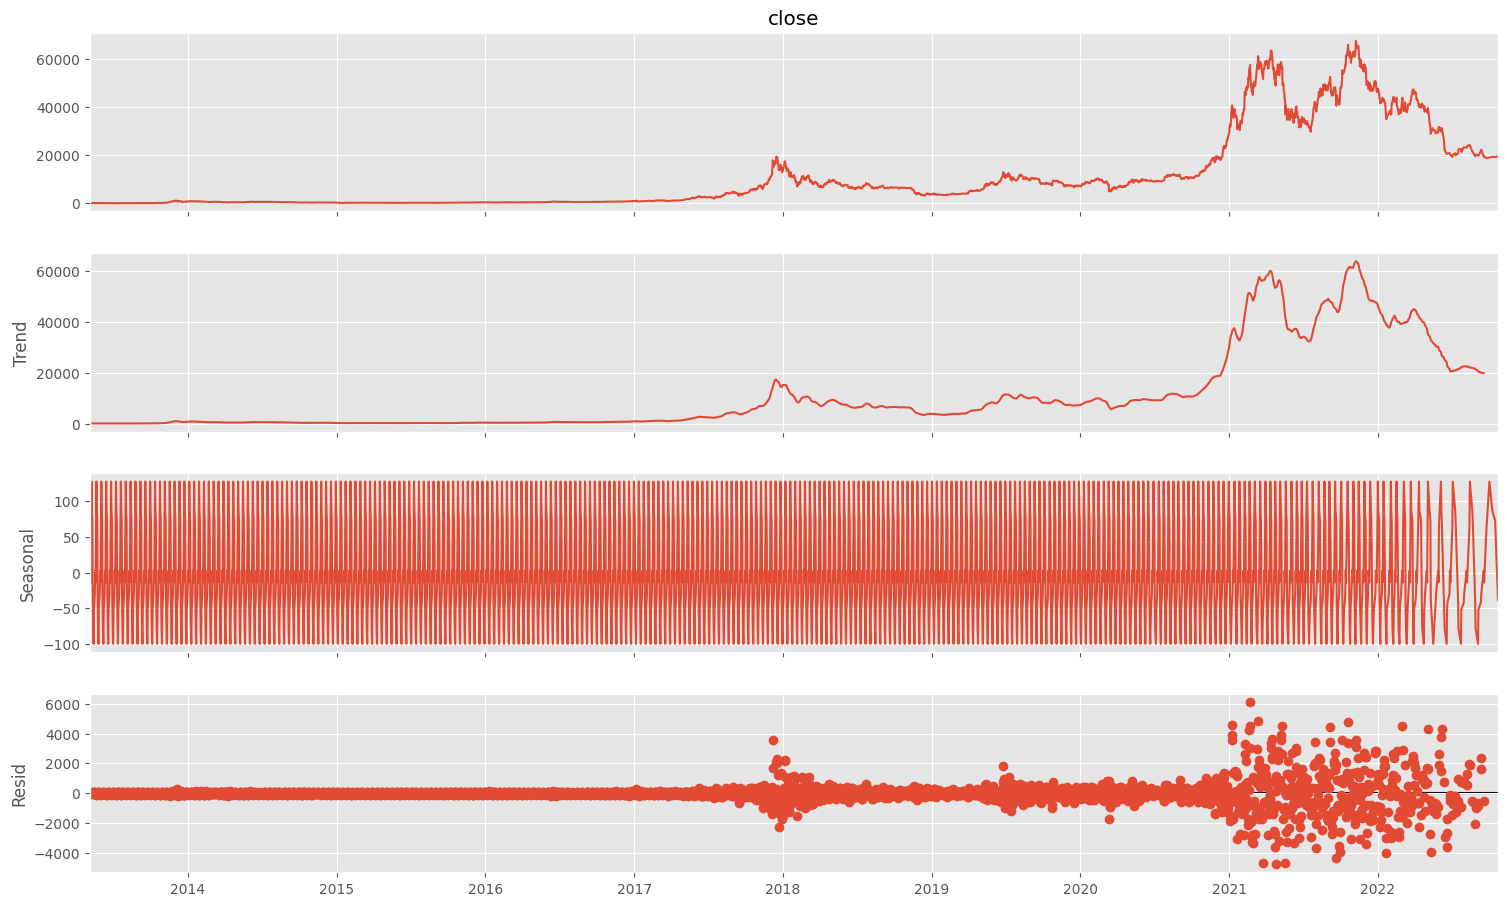

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(closing_price['close'], period = 12)
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

<Figure size 2000x1000 with 0 Axes>

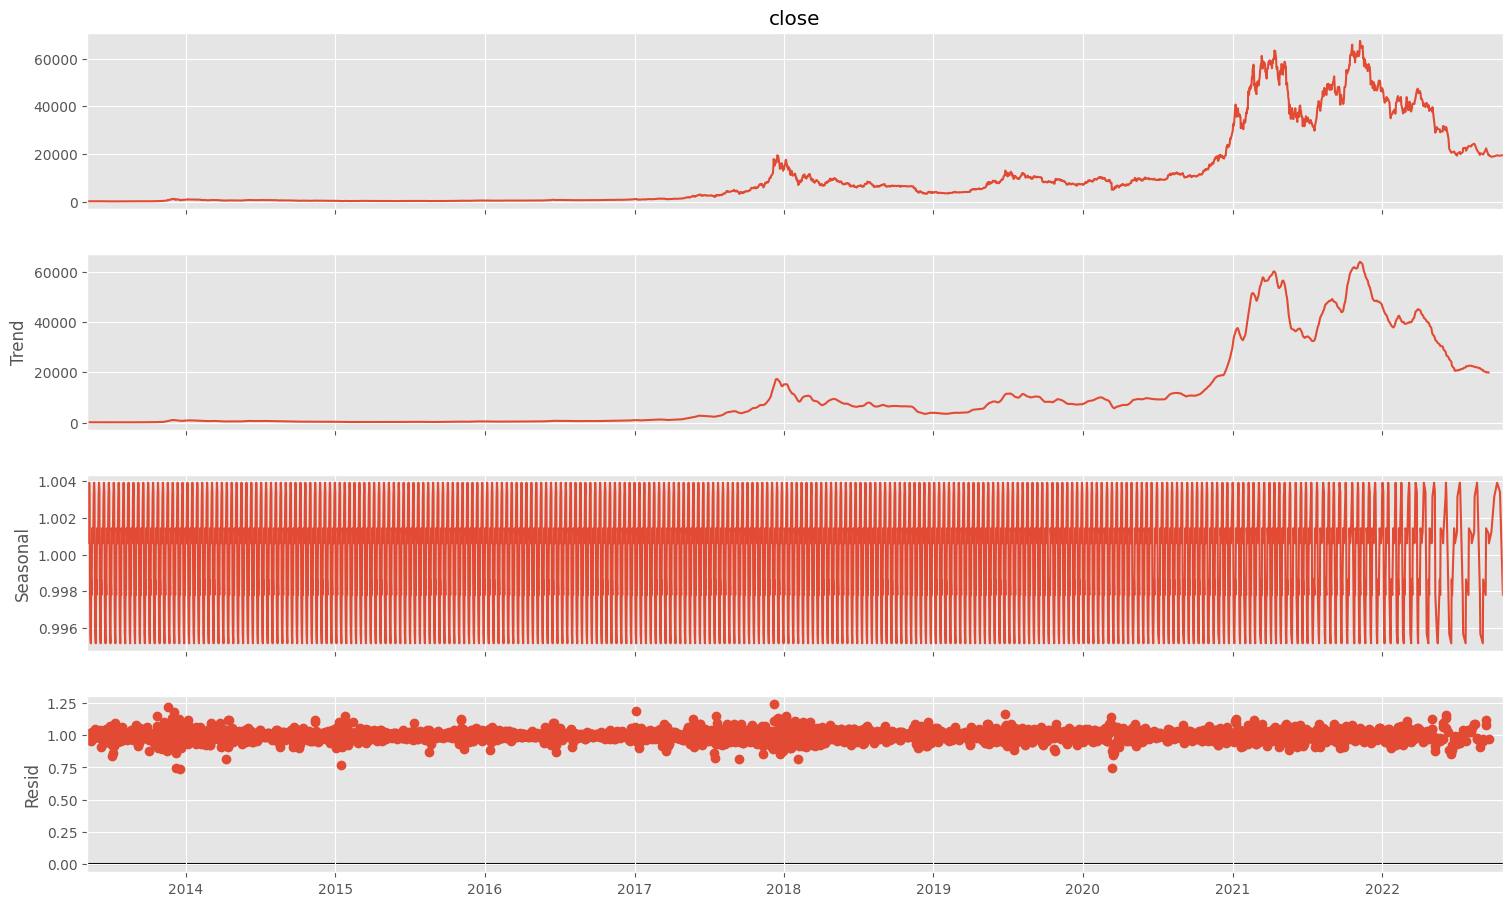

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(closing_price['close'], period = 12,model='multiplicative')
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

### The shrinkage of datapoints happen it mean the time series is multiplicative

## Box plot for Outliers

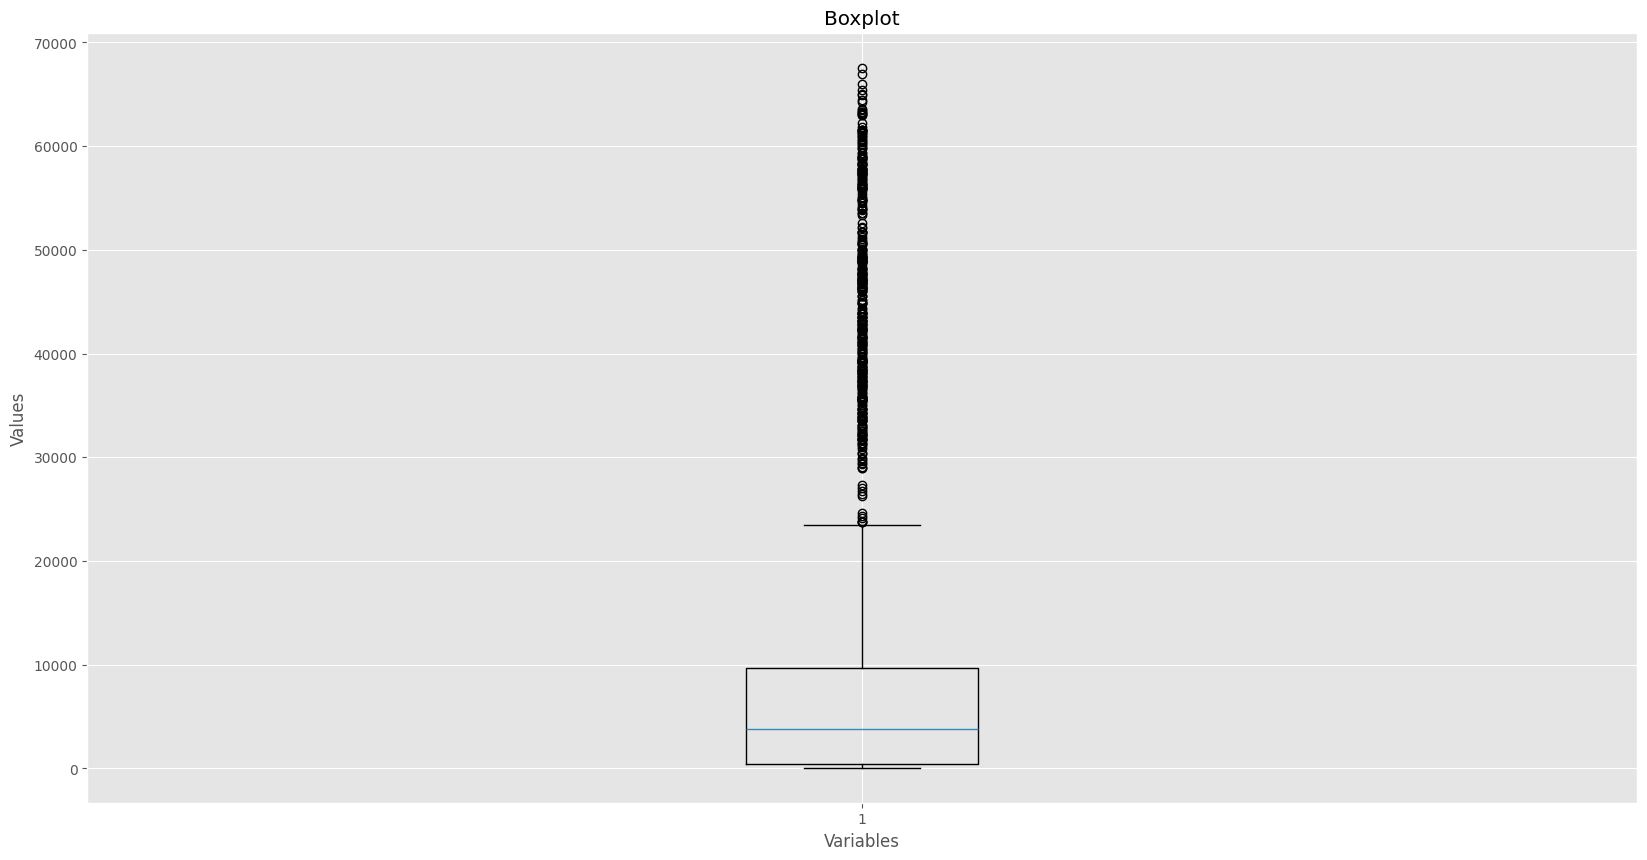

In [24]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.boxplot(closing_price["close"])
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Boxplot')
plt.show()

## Here as we can see there are outliers present we to treat them

### we are inpute the values using Exponentially Weighted Moving Average(emwa) in place of outliers

In [6]:
#Creating the functions
def detect_outliers(df, window=10, z_threshold=2.5):

    """
    Applies dynamic Z-Score to detect outliers based on a moving window.
    """

    df['RollingMean'] = df['close'].rolling(window=window).mean()
    df['RollingStd'] = df['close'].rolling(window=window).std()
    df['ZScore'] = (df['close'] - df['RollingMean']) / df['RollingStd']
    df['Outlier'] = df['ZScore'].abs() > z_threshold
    return df
def correct_with_ewma(df, span=10):

    """
    Replaces outlier values using Exponentially Weighted Moving Average (EWMA).
    """

    df['Corrected'] = df['close'].copy()
    df.loc[df['Outlier'], 'Corrected'] = np.nan
    df['Corrected'] = df['Corrected'].fillna(method='ffill').ewm(span=span, adjust=False).mean()
    return df

def plot_graph(df, filename="outliers_correction_crypto.png"):

    """
    Generates a comparative chart of the original series, outliers, and the corrected series.
    """

    print("📈 Generating chart for the series with and without outliers...")
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['close'], label="Original Price", linestyle='--', marker='o', alpha=0.4)
    plt.plot(df.index, df['Corrected'], label="Corrected (EWMA)", color='green')
    plt.scatter(df.index[df['Outlier']], df['close'][df['Outlier']], color='red', label="Detected Outliers")
    plt.title("💹 Cryptoasset Price – Outlier Correction with Dynamic Z-Score + EWMA")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(filename)
    plt.show()
    print(f"✅ Chart saved as: {filename}")    

In [7]:
detect_outliers(closing_price, window=10, z_threshold=2.5)

,close,RollingMean,RollingStd,ZScore,Outlier
date,,,,,
2013-05-05,115.910004,NaN,NaN,NaN,False
2013-05-06,112.300003,NaN,NaN,NaN,False
2013-05-07,111.500000,NaN,NaN,NaN,False
2013-05-08,113.566002,NaN,NaN,NaN,False
2013-05-09,112.669998,NaN,NaN,NaN,False
...,...,...,...,...,...
2022-09-25,18802.097976,20301.824169,1156.913234,-1.296317,False
2022-10-02,19044.107272,20066.344062,1148.418399,-0.890126,False
2022-10-09,19446.426194,20049.305183,1157.060543,-0.521044,False


In [8]:
correct_with_ewma(closing_price, span=10)

,close,RollingMean,RollingStd,ZScore,Outlier,Corrected
date,,,,,,
2013-05-05,115.910004,NaN,NaN,NaN,False,115.910004
2013-05-06,112.300003,NaN,NaN,NaN,False,115.253640
2013-05-07,111.500000,NaN,NaN,NaN,False,114.571160
2013-05-08,113.566002,NaN,NaN,NaN,False,114.388404
2013-05-09,112.669998,NaN,NaN,NaN,False,114.075967
...,...,...,...,...,...,...
2022-09-25,18802.097976,20301.824169,1156.913234,-1.296317,False,20438.139746
2022-10-02,19044.107272,20066.344062,1148.418399,-0.890126,False,20184.679296
2022-10-09,19446.426194,20049.305183,1157.060543,-0.521044,False,20050.451459


📈 Generating chart for the series with and without outliers...


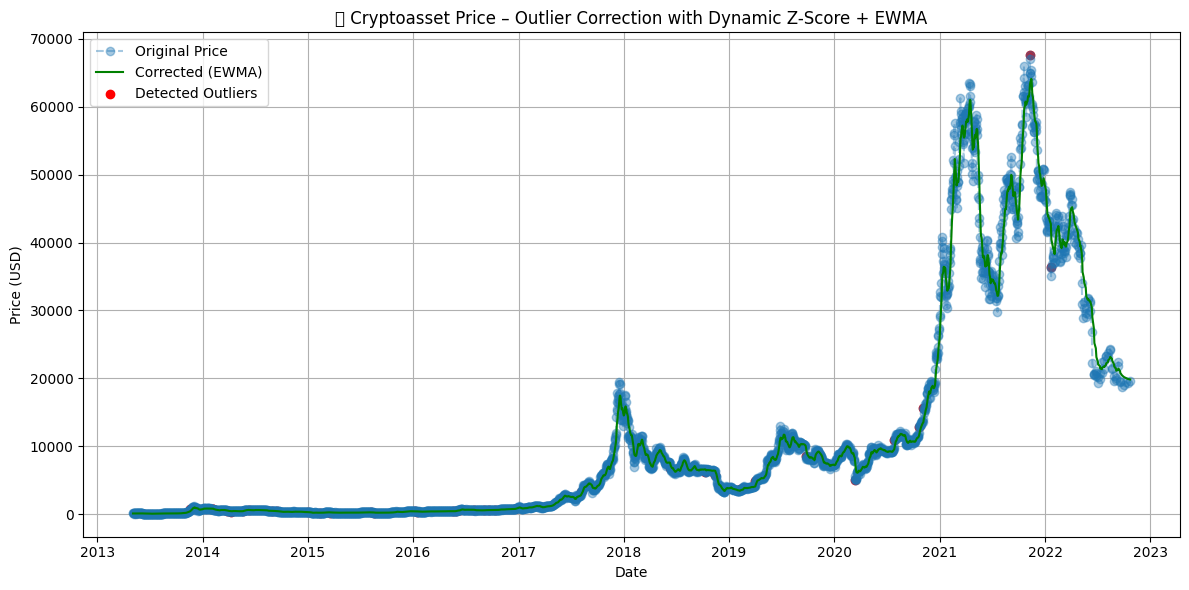

✅ Chart saved as: outliers_correction_crypto.png


In [9]:
plot_graph(closing_price, filename="outliers_correction_crypto.png")

## Train_test split

### So we are done with the outlier treatment and feature extraction so for modelling we are gonna use  ARIMA, which stands for Autoregressive Integrated Moving Average for forecasting the future prices

### Splitting the data in test and train by taking 80/20 split

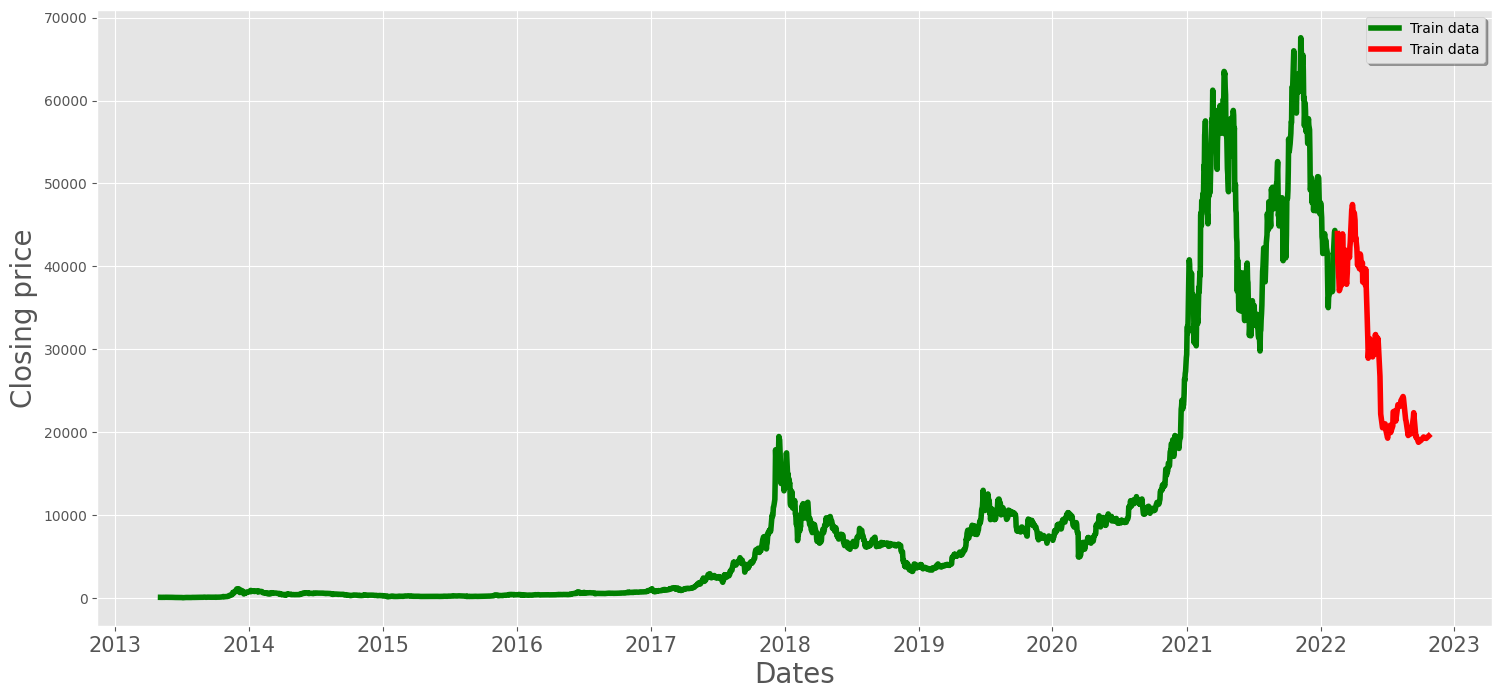

In [8]:
train_data = closing_price[0:-100]
test_data = closing_price[-100:]
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing price', fontsize = 20)
plt.xticks(fontsize=15)
plt.plot(train_data, 'green', label = 'Train data', linewidth = 4)
plt.plot(test_data, 'red', label = 'Train data', linewidth = 4)
plt.legend(shadow=True)

## Model building

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
train_data

,close,RollingMean,RollingStd,ZScore,Outlier,Corrected
date,,,,,,
2013-05-05,115.910004,NaN,NaN,NaN,False,115.910004
2013-05-06,112.300003,NaN,NaN,NaN,False,115.253640
2013-05-07,111.500000,NaN,NaN,NaN,False,114.571160
2013-05-08,113.566002,NaN,NaN,NaN,False,114.388404
2013-05-09,112.669998,NaN,NaN,NaN,False,114.075967
...,...,...,...,...,...,...
2022-02-10,43565.112173,40814.529111,2892.672320,0.950880,False,41742.760657
2022-02-11,42407.937938,41263.562631,2737.363626,0.418057,False,41863.701981
2022-02-12,42244.469987,41613.682373,2599.634921,0.242645,False,41932.932527


In [46]:
history = train_data['Corrected']#since corrected is after outlier treatment
history

date
2013-05-05      115.910004
2013-05-06      115.253640
2013-05-07      114.571160
2013-05-08      114.388404
2013-05-09      114.075967
                  ...     
2022-02-10    41742.760657
2022-02-11    41863.701981
2022-02-12    41932.932527
2022-02-13    41981.038493
2022-02-14    42091.198710
Name: Corrected, Length: 3148, dtype: float64

In [47]:
model = ARIMA(history, order = (1,1,1))
model

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Corrected   No. Observations:                 3148
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19816.295
Date:                Fri, 08 Aug 2025   AIC                          39638.589
Time:                        19:11:39   BIC                          39656.752
Sample:                             0   HQIC                         39645.106
                               - 3148                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8567      0.004    226.436      0.000       0.849       0.864
ma.L1         -0.1101      0.009    -12.156      0.000      -0.128      -0.092
sigma2      1.727e+04    114.042    151.449      0.000     1.7e+04    1.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             98374.38
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):            2662.88   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Results without Hyperparameter tuning on Corrected values

In [61]:
y_test=test_data['Corrected']

In [54]:
mean_squared_error([y_test[0]], model.forecast())

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


64071.22007570646

In [57]:
np.sqrt(mean_squared_error([y_test[0]], model.forecast()))

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


np.float64(253.12293470901932)

## Hyperparameter tuning

In [59]:
p_values = range(0, 3)
d_values =  range(0, 3)
q_values = range(0, 3)
for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i, j, k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [ ]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

def evaluate_models(dataset, test, p_values, d_values, q_values):
    if isinstance(dataset, pd.DataFrame):
        dataset = dataset['close']
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [17]:
y_test=test_data['close']
history=train_data['close']

In [73]:
evaluate_models(history, y_test, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=24858.837
ARIMA(0, 0, 1) RMSE=15004.248


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

ARIMA(0, 0, 2) RMSE=10675.440
ARIMA(0, 1, 0) RMSE=1713.512
ARIMA(0, 1, 1) RMSE=1718.089
ARIMA(0, 1, 2) RMSE=1723.275
ARIMA(0, 2, 0) RMSE=2416.093
ARIMA(0, 2, 1) RMSE=1715.284
ARIMA(0, 2, 2) RMSE=1719.826
ARIMA(1, 0, 0) RMSE=1711.168
ARIMA(1, 0, 1) RMSE=1715.942
ARIMA(1, 0, 2) RMSE=1720.958
ARIMA(1, 1, 0) RMSE=1718.785
ARIMA(1, 1, 1) RMSE=1720.101
ARIMA(1, 1, 2) RMSE=1724.599
ARIMA(1, 2, 0) RMSE=2115.313
ARIMA(1, 2, 1) RMSE=1720.544
ARIMA(1, 2, 2) RMSE=1732.962
ARIMA(2, 0, 0) RMSE=1716.605
ARIMA(2, 0, 1) RMSE=1714.950
ARIMA(2, 0, 2) RMSE=1720.775
ARIMA(2, 1, 0) RMSE=1722.682
ARIMA(2, 1, 1) RMSE=1724.249
ARIMA(2, 1, 2) RMSE=1728.490
ARIMA(2, 2, 0) RMSE=2016.917
ARIMA(2, 2, 1) RMSE=1724.340


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

ARIMA(2, 2, 2) RMSE=2899.591
Best ARIMA(1, 0, 0) RMSE=1711.168


In [19]:
history = [x for x in train_data['close']]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(1,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(y_test[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE of ARIMA Model: 1711.1682806284787


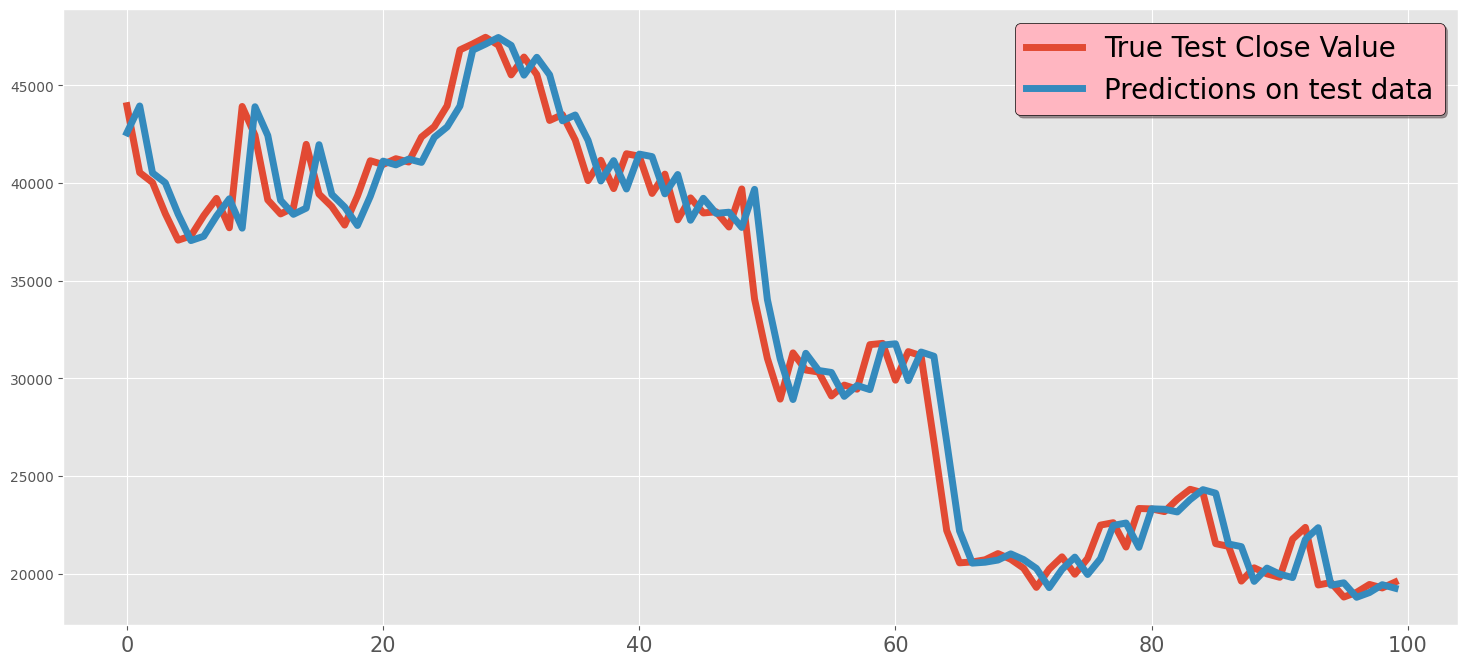

In [79]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(y_test)),y_test, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [24]:
model = ARIMA(history, order = (1,0,0))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3248
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -26213.116
Date:                Sat, 09 Aug 2025   AIC                          52432.232
Time:                        12:37:36   BIC                          52450.490
Sample:                             0   HQIC                         52438.773
                               - 3248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9694.5871     80.194    120.889      0.000    9537.409    9851.765
ar.L1          0.9987      0.000   2591.079      0.000       0.998       0.999
sigma2      5.981e+05   4280.630    139.729      0.0

In [25]:
#Saving the model
import pickle
filename = 'arima_model.sav'
pickle.dump(model, open(filename, 'wb'))
print(f"Model saved as {filename}")

Model saved as arima_model.sav
